# Challenge 2 - Intermedio

## Visualización de grandes bases de datos

### Eyder Uriel Kinil Cervera - Cógido 216910473

Este challenge lleva a los estudiantes un paso más allá en el uso de PySpark, implementando Spark ML para realizar un modelo predictivo basado en una gran base de datos.

## Objetivo

Aplicar algoritmos de machine learning en grandes bases de datos utilizando Spark ML.

### Objetivo especifico

Descargar una base de datos desde UCI Machine Learning Repository, limpiarla, y entrenar un modelo predictivo de clasificación utilizando Spark ML.

In [10]:
#Importando liberías
import pandas as pd
import pyspark
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Ruta del csv
file_path = "../winequality-red.csv"

In [3]:
#Importando datos del csv con pyspark.pandas
df = pd.read_csv(file_path,sep=';')

In [4]:
#Revisando la forma del dataframe
df.shape

(1599, 12)

In [5]:
#Revisando las primeras filas
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#Revisando las últimas filas
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
#Revisando la estadistica descriptiva
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#Revisando los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Ventajas de Spark ML
- Escalabilidad: Puede procesar conjuntos de datos masivos distribuidos en clusters.
- Integración con otras herramientas de Spark: Compatible con Spark SQL y Spark Streaming.
- Interfaz de alto nivel: Los Pipelines facilitan el diseño y ejecución de flujos de trabajo complejos.
- Flexibilidad: Admite tanto usuarios que requieren APIs listas para usar como aquellos que necesitan personalización.

In [11]:
#Analizando la correlación del dataset
corr_matrix = df.corr(method='pearson')
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level=0':'variable_1','level_1':'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs',ascending=False).reset_index(drop=True)
corr_matrix_tidy

,level_0,variable_2,r,r_abs
0,fixed acidity,pH,-0.682978,0.682978
1,fixed acidity,citric acid,0.671703,0.671703
2,fixed acidity,density,0.668047,0.668047
3,free sulfur dioxide,total sulfur dioxide,0.667666,0.667666
4,volatile acidity,citric acid,-0.552496,0.552496
...,...,...,...,...
61,residual sugar,quality,0.013732,0.013732
62,volatile acidity,free sulfur dioxide,-0.010504,0.010504
63,chlorides,free sulfur dioxide,0.005562,0.005562
64,residual sugar,sulphates,0.005527,0.005527


[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'residual sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free sulfur dioxide'),
 Text(6.5, 0, 'total sulfur dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol'),
 Text(11.5, 0, 'quality')]

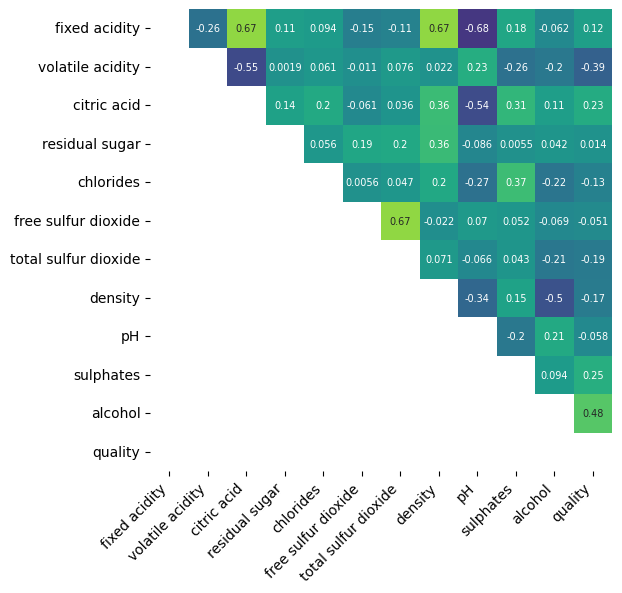

In [12]:
#Mapa de calor de la correlación
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 7},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "viridis",
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

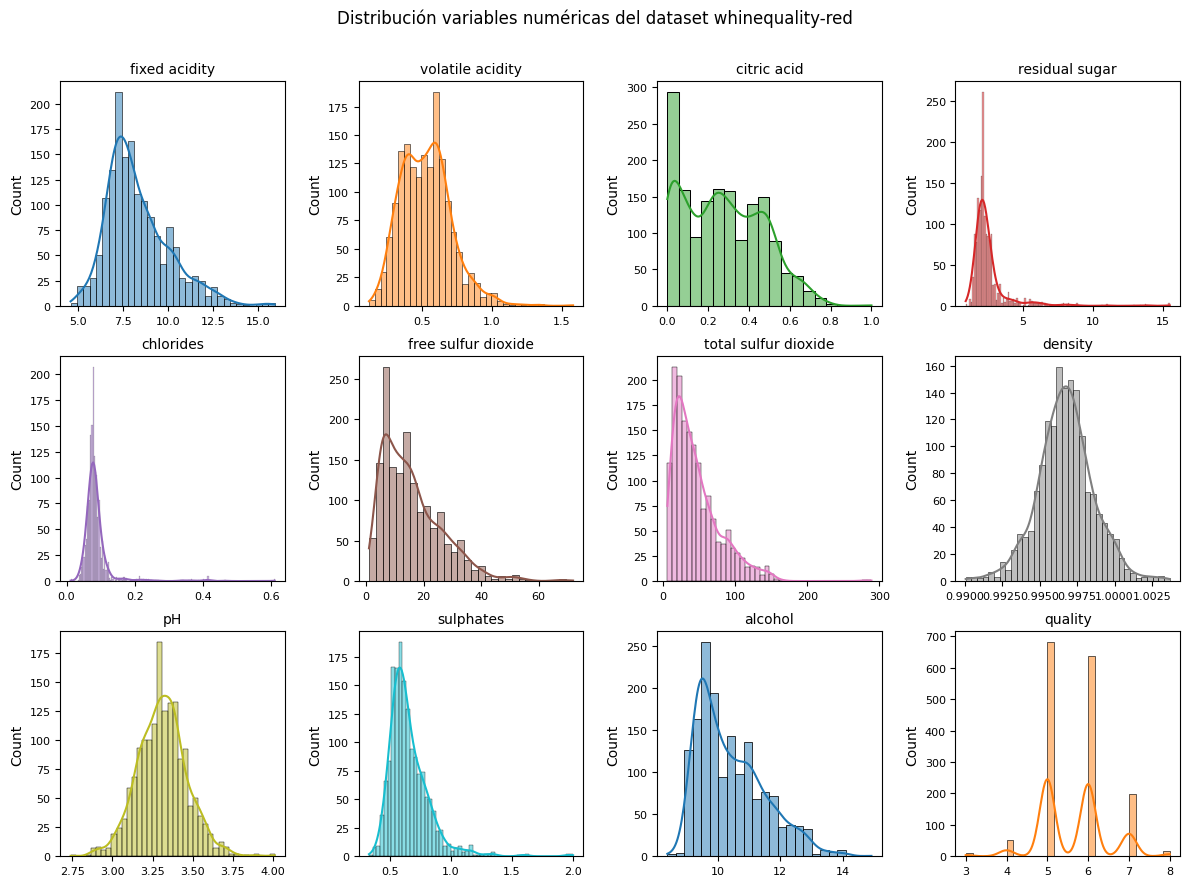

In [13]:
#Gráficos de cada variable 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
   
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas del dataset whinequality-red', fontsize = 12);